In [2]:
import pandas

In [3]:
usd_rates = pandas.read_excel('dollar.xlsx')

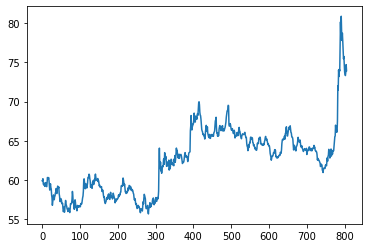

In [4]:
usd_rates.curs.plot()

In [5]:
past = 28 # 7 дней прошлого
future = 7 #7 дней будущего

In [6]:
money = usd_rates.curs

In [7]:
start = past
end = len(money) - 7

In [8]:
count = len(money)
print(f"Значений {count}, c {start} по {future}") 

Значений 806, c 28 по 7


In [9]:
table = []
for i in range(start, end):
    s = money[(i-past):(i+future)]
    table.append(list(s))

In [10]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")

    

In [11]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [12]:
datarfame = pandas.DataFrame(table, columns=(past_columns+future_columns))

In [13]:
# учебник
X = datarfame[past_columns][:-10] # основа предсказания
Y = datarfame[future_columns][:-10] # то, что предсказываем (target)

In [14]:
# проверочная часть
X_test = datarfame[past_columns][-10:]
Y_test = datarfame[future_columns][-10:]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LR = LinearRegression()

In [17]:
LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
prediction = LR.predict([X_test.iloc[0]])

In [19]:
Y_test.iloc[0]

future_0    80.1570
future_1    78.0443
future_2    80.8815
future_3    78.8493
future_4    77.7928
future_5    78.7223
future_6    77.7325
Name: 761, dtype: float64

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

Day #0, error 1.2806960583490994, mean err 1.2806960583490994


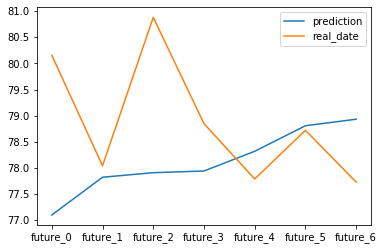

Day #1, error 3.560834899248312, mean err 3.025177756391169


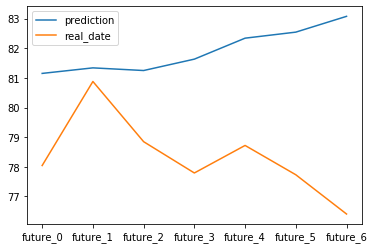

Day #2, error 1.8129799923113938, mean err 1.27873854705653


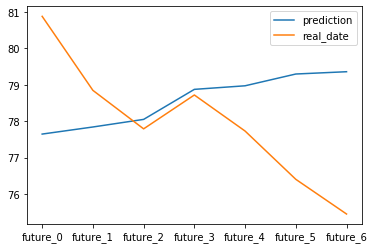

Day #3, error 5.3212231338114515, mean err 3.6825802766685922


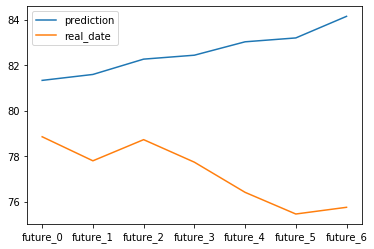

Day #4, error 3.3350368630169465, mean err 1.8600780224489253


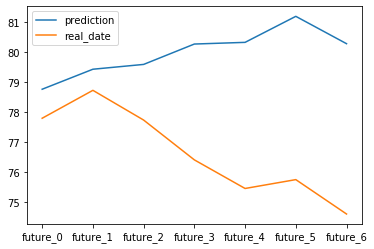

Day #5, error 3.172241954963389, mean err 1.2743385407005872


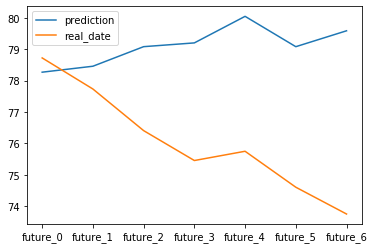

Day #6, error 4.476129914984254, mean err 1.7023621488141478


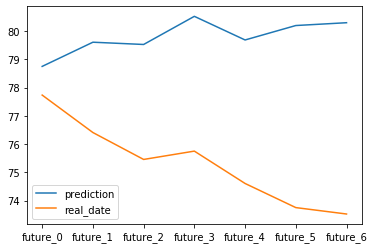

Day #7, error 4.031016283628863, mean err 1.1024978159295142


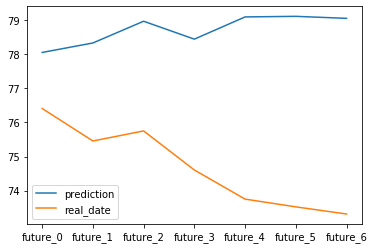

Day #8, error 2.726908993266026, mean err 1.853705292448262


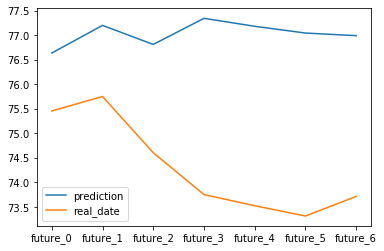

Day #9, error 1.6800495221733587, mean err 3.0163768771347486


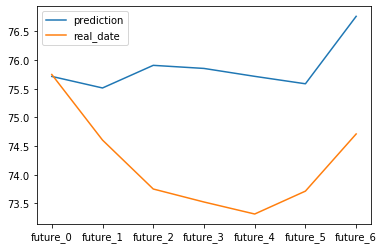

In [32]:
for i in range(10):
    prediction = LR.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0],Y_test.iloc[i])
    mean_err = mean_absolute_error(prediction[0], Y_test.iloc[0])
    print(f"Day #{i}, error {err}, mean err {mean_err}")
    
    plt.plot(prediction[0], label='prediction')
    plt.plot(Y_test.iloc[i], label='real_date')
    plt.legend()
    plt.show()

In [33]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=1)
KNN.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Day #0, error 1.8431142857142848, mean err 1.8431142857142848


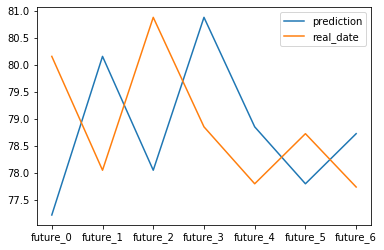

Day #1, error 1.1359428571428591, mean err 1.8431142857142848


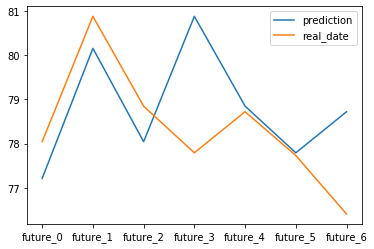

Day #2, error 1.879471428571431, mean err 1.8431142857142848


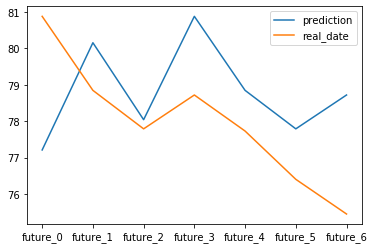

Day #3, error 2.2256428571428586, mean err 1.8431142857142848


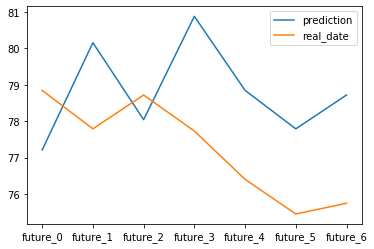

Day #4, error 2.3364000000000016, mean err 1.8431142857142848


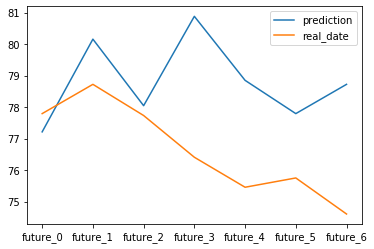

Day #5, error 3.179300000000004, mean err 1.8431142857142848


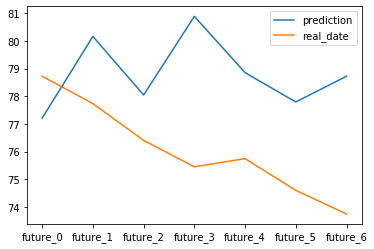

Day #6, error 3.6390428571428606, mean err 1.8431142857142848


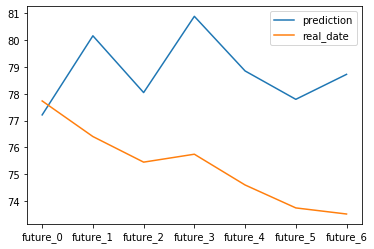

Day #7, error 4.1217142857142886, mean err 1.8431142857142848


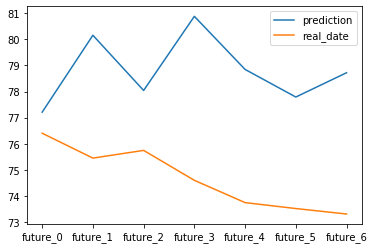

Day #8, error 4.506414285714287, mean err 1.8431142857142848


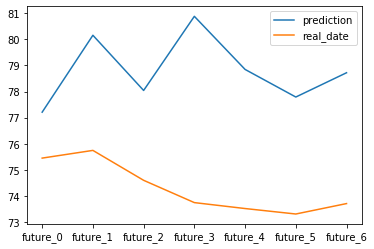

Day #9, error 7.735157142857141, mean err 12.421928571428571


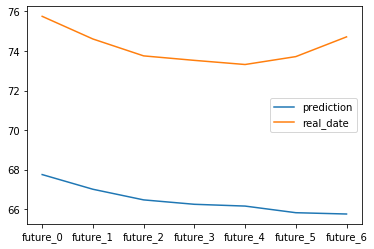

In [34]:
for i in range(10):
    prediction = KNN.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0],Y_test.iloc[i])
    mean_err = mean_absolute_error(prediction[0], Y_test.iloc[0])
    print(f"Day #{i}, error {err}, mean err {mean_err}")
    
    plt.plot(prediction[0], label='prediction')
    plt.plot(Y_test.iloc[i], label='real_date')
    plt.legend()
    plt.show()

In [35]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
MLP.fit(X, Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Day #0, error 4.949721858021287, mean err 4.949721858021287


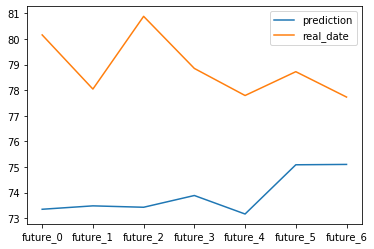

Day #1, error 3.0240191829535905, mean err 3.442997902678085


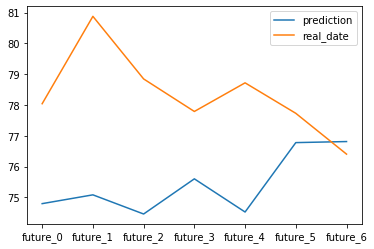

Day #2, error 2.9352114221764447, mean err 3.050646693233728


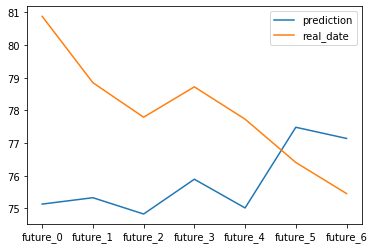

Day #3, error 1.6881075174886138, mean err 1.6484682130908936


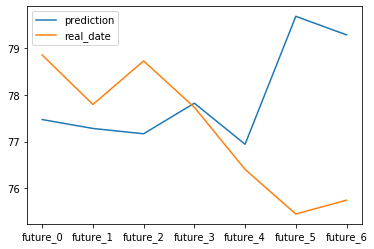

Day #4, error 2.4112775659456775, mean err 1.365075411569606


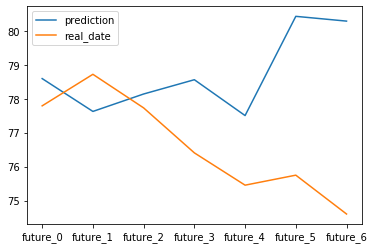

Day #5, error 3.047380594778996, mean err 1.2253654750197225


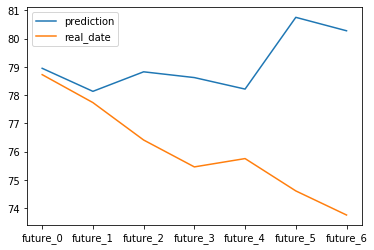

Day #6, error 4.700887674005342, mean err 1.7433869762387368


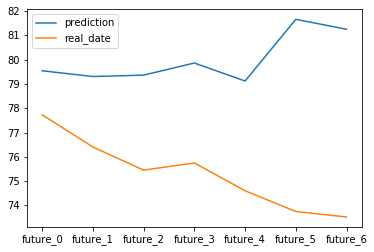

Day #7, error 5.297387522038958, mean err 1.85615113324686


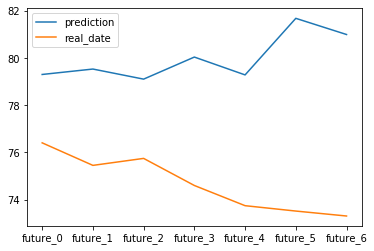

Day #8, error 6.054367695006472, mean err 2.188815716994983


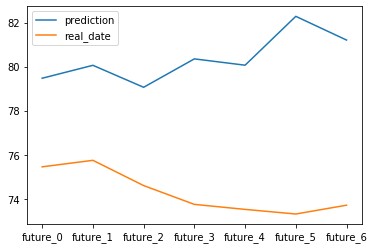

Day #9, error 5.3746592825770865, mean err 1.686651391038404


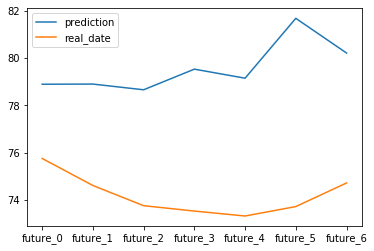

In [36]:
for i in range(10):
    prediction = MLP.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0],Y_test.iloc[i])
    mean_err = mean_absolute_error(prediction[0], Y_test.iloc[0])
    print(f"Day #{i}, error {err}, mean err {mean_err}")
    
    plt.plot(prediction[0], label='prediction')
    plt.plot(Y_test.iloc[i], label='real_date')
    plt.legend()
    plt.show()

In [37]:
import pickle #save model to file

In [38]:
pickle.dump(MLP, open('mlp_model.bin', 'wb')) # выгрузка файла

In [39]:
loaded_model = pickle.load(open('mlp_model.bin', 'rb')) # загрузка файла

In [40]:
loaded_model.predict([X_test.iloc[5]])

array([[78.94630787, 78.13080746, 78.82243131, 78.61806374, 78.21076488,
        80.75132549, 80.27556342]])

In [41]:
mean_absolute_error(prediction[0], Y_test.iloc[0])

1.686651391038404

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
RFG = RandomForestRegressor()

In [76]:
params = {
    'max_depth': [3, 5, 20],
    "n_estimators": [100, 1000, 2000],
    'max_features': ['sqrt', 'log2'],
}
# 12 комбинаций
#cv = 5 -> 60 моделей
#n_jobs -позволяем использовать все ядра нашего процессора
GS = GridSearchCV(RFG, params, 'neg_mean_absolute_error', cv=5, n_jobs=-1)
GS.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [77]:
GS.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

In [78]:
GS.best_score_

-0.8585188990251563

In [79]:
GS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Day #0, error 3.8023887652614303


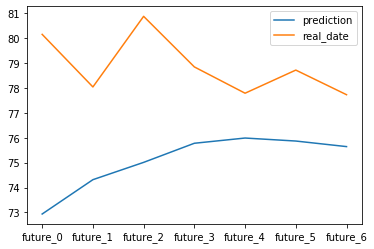

Day #1, error 3.602342354885721


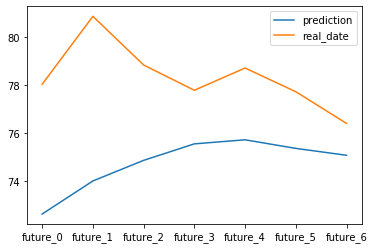

Day #2, error 3.725409988210298


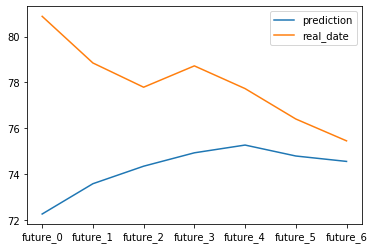

Day #3, error 3.53365432719912


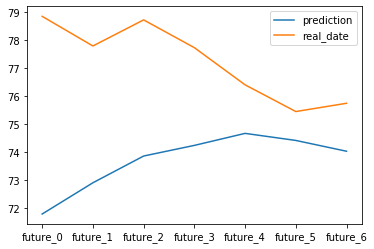

Day #4, error 3.0719551148781585


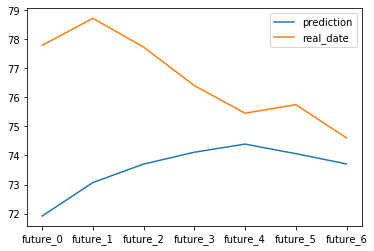

Day #5, error 2.8608046093602644


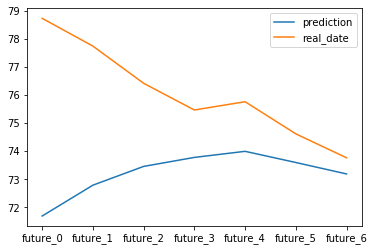

Day #6, error 2.314295512839396


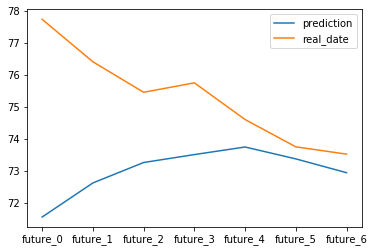

Day #7, error 1.7578092580747904


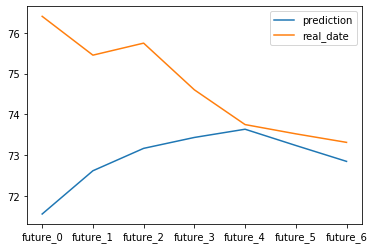

Day #8, error 1.6186196175479313


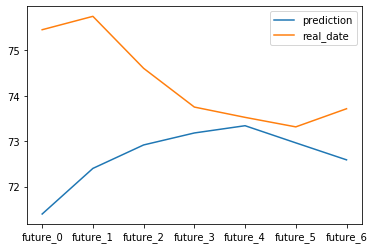

Day #9, error 1.703776716639995


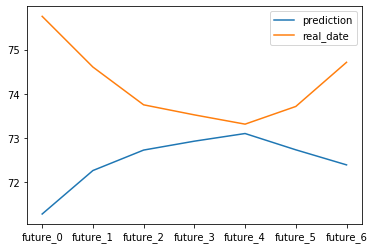

In [80]:
for i in range(10):
    prediction = GS.best_estimator_.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0],Y_test.iloc[i])
    print(f"Day #{i}, error {err}")
    
    plt.plot(prediction[0], label='prediction')
    plt.plot(Y_test.iloc[i], label='real_date')
    plt.legend()
    plt.show()